In [198]:
import pandas as pd
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2
import seaborn as sns
from matplotlib import pyplot as plt
import numpy as np
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2

In [239]:
df = pd.read_csv('dataset.csv',sep=';')
df = df.iloc[: , :9]
df = df.rename(columns={df.columns[0]: 'days_of_production',df.columns[1]: 'pond_identifier',
                       df.columns[2]: 'temp_morning',df.columns[3]: 'temp_afternoon',
                       df.columns[4]: 'temp_evening',df.columns[5]: 'feed',
                       df.columns[6]: 'tan_ppm',df.columns[7]: 'phosphate_ppm',df.columns[8]: 'phytoplankton_cells'})
df = df.dropna(axis=1, how='all')
df = df.dropna(how='all')

In [295]:
df.head(5)

,days_of_production,pond_identifier,temp_morning,temp_afternoon,temp_evening,feed,tan_ppm,phosphate_ppm,phytoplankton_cells
0,1.0,A1,29.0,30.0,29.0,35.0,NaN,NaN,NaN
1,2.0,A1,30.0,32.0,29.0,35.0,NaN,NaN,NaN
2,3.0,A1,29.0,33.0,31.0,4.0,606.0,36.0,3.0
3,4.0,A1,29.0,32.0,31.0,4.0,NaN,NaN,NaN
4,5.0,A1,30.0,30.0,28.0,45.0,NaN,NaN,NaN


In [298]:
# df.feed.unique()
# df['feed'].value_counts()

Pertanyaan
1. Cari temperatur yang paling berpengaruh untuk masing masing (feed, tan, phosphate, phytoplankton)
2. Buat machine learning iuntuk predict isi tan, phosphate, phytoplankton yang kosong

Limitation:
1. NaN value in tan, phosphate, phytoplankton
2. 3thousand more missing value
3. Inconsistent valu in temp colum
4. Inconsistent format value

In [240]:

#Change value where value=="-" and change type to number
df['temp_afternoon'].mask(df['temp_afternoon'] == '-', 0, inplace=True)
df['temp_afternoon'] = pd.to_numeric(df['temp_afternoon']).astype(float)

df['temp_evening'].mask(df['temp_evening'] == '-', 0, inplace=True)
df['temp_evening'] = pd.to_numeric(df['temp_evening']).astype(float)

df['feed'].mask(df['feed'] == '-', "0", inplace=True)
df['feed'] = df['feed'].str.replace(',', '').astype(float)
df['feed'] = pd.to_numeric(df['feed'])

df['tan_ppm'] = df['tan_ppm'].str.replace(',', '').astype(float)

df['phosphate_ppm'] = df['phosphate_ppm'].str.replace(',', '').astype(float)
df['phosphate_ppm'] = pd.to_numeric(df['phosphate_ppm'])

df['temp_morning'] = pd.to_numeric(df['temp_morning'])
df['phytoplankton_cells'] = pd.to_numeric(df['phytoplankton_cells'])



In [205]:
df.describe()

,days_of_production,temp_morning,temp_afternoon,temp_evening,feed,tan_ppm,phosphate_ppm,phytoplankton_cells
count,889.000000,889.000000,889.000000,889.000000,804.000000,248.000000,248.000000,248.000000
mean,45.291339,28.692913,30.339708,29.600675,47.008706,679.463710,163.536290,9.612097
std,26.229229,0.909884,2.086369,1.965708,56.814164,520.326609,112.716542,4.680809
min,1.000000,26.000000,0.000000,0.000000,4.000000,2.000000,1.000000,2.000000
25%,23.000000,28.000000,30.000000,29.000000,22.000000,283.000000,86.000000,5.500000
50%,45.000000,29.000000,31.000000,30.000000,30.000000,569.000000,142.500000,10.000000
75%,67.000000,29.000000,31.000000,30.000000,45.000000,912.250000,219.750000,12.500000
max,94.000000,31.000000,33.000000,32.000000,485.000000,2774.000000,581.000000,23.500000


In [209]:
# df.phosphate_ppm.unique()

df.dtypes

days_of_production     float64
pond_identifier         object
temp_morning           float64
temp_afternoon         float64
temp_evening           float64
feed                   float64
tan_ppm                float64
phosphate_ppm          float64
phytoplankton_cells    float64
dtype: object

## Get Correlation of each column

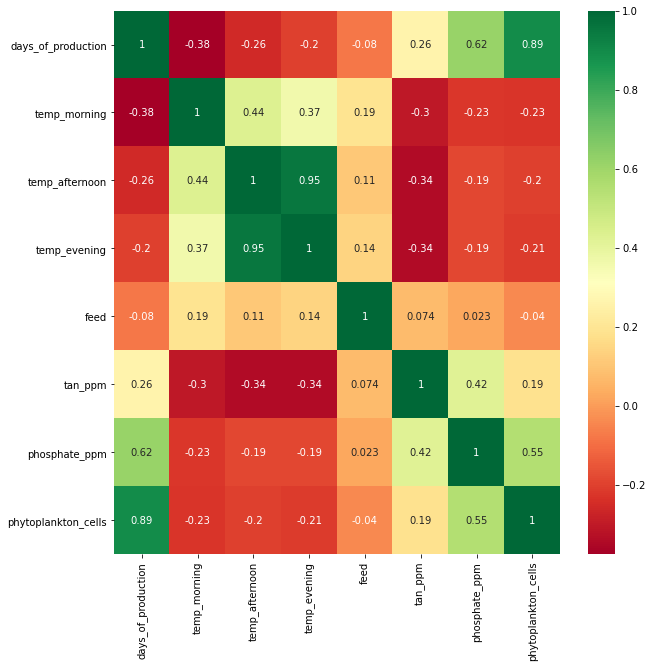

In [210]:
# get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(10,10))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

## Feature Importance of each column with feed
Cari temperatur yang paling berpengaruh untuk masing masing (feed, tan, phosphate, phytoplankton


c:\users\fandy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:5: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  """


[0.33541637 0.35166552 0.31291811]


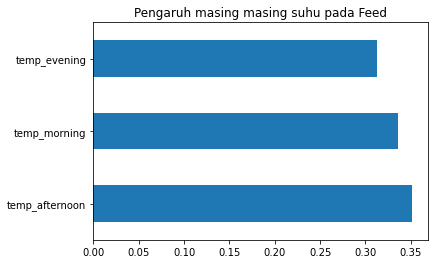

In [250]:
X = df[["temp_morning","temp_afternoon","temp_evening"]]  #independent columns
y = df[["feed"] ]    #target column
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Pengaruh masing masing suhu pada Feed")
plt.show()


c:\users\fandy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:7: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  import sys


[0.32587867 0.39822122 0.27590011]


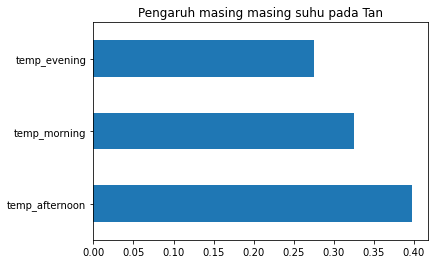

In [287]:
dftan = df[~df["tan_ppm"].isnull()] #remove nan rows at tan_ppm row

X = dftan[["temp_morning","temp_afternoon","temp_evening"]]  #independent columns
y = dftan[["tan_ppm"]]   #target column
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Pengaruh masing masing suhu pada Tan")
plt.show()

c:\users\fandy\appdata\local\programs\python\python37\lib\site-packages\ipykernel_launcher.py:8: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  


[0.31893062 0.41208261 0.26898677]


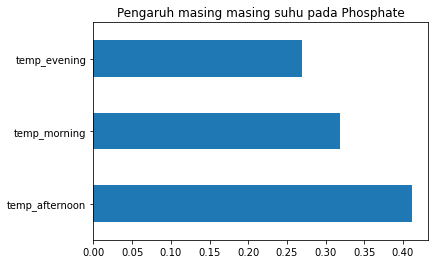

In [292]:
dfphosphate = df[~df["phosphate_ppm"].isnull()] #remove nan rows at phytoplankton_cells row

X = dfphosphate[["temp_morning","temp_afternoon","temp_evening"]]  #independent columns
y = dfphosphate[["phosphate_ppm"]]   #target column
model = ExtraTreesClassifier()
model.fit(X,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.title("Pengaruh masing masing suhu pada Phosphate")
plt.show()